In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
train_data_X=np.array([1, 2, 4 ,5, 3, 3, 2, 1]).reshape(-1,1)
train_data_Y=np.array([1.5, 2.6, 5, 6, 4, 5.2, 3.1, 1.7]).reshape(-1,1)
train_data=np.concatenate((train_data_X,train_data_Y),axis=1)
train_data=pd.DataFrame(data=train_data,columns=['quantity','price'])

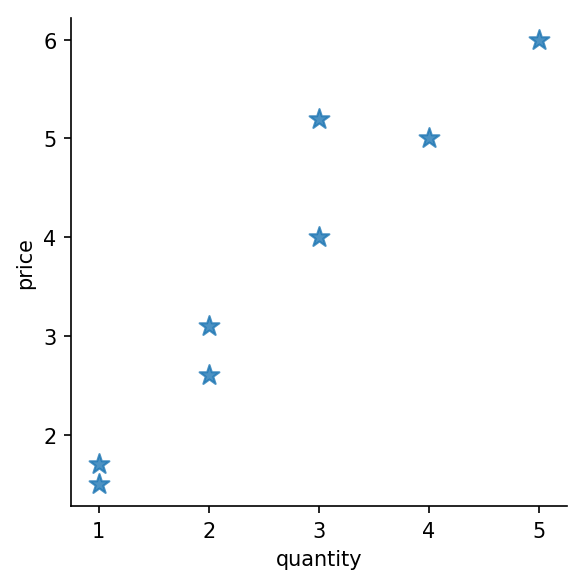

In [50]:
plt.rcParams['figure.dpi']=150
plt.rcParams['lines.markersize']=10
sns.lmplot(x='quantity',y='price',data=train_data,fit_reg=False,size=4,markers="*")

In [4]:
from sklearn import linear_model

In [5]:
reg=linear_model.LinearRegression()
reg.fit(train_data_X,train_data_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
from sklearn.metrics import mean_squared_error
predict_data_Y=reg.predict(train_data_X)
MSE1=mean_squared_error(predict_data_Y,train_data_Y)
MSE1

0.20977477477477482

In [7]:
a=reg.coef_.item()

In [8]:
b=reg.intercept_.item()

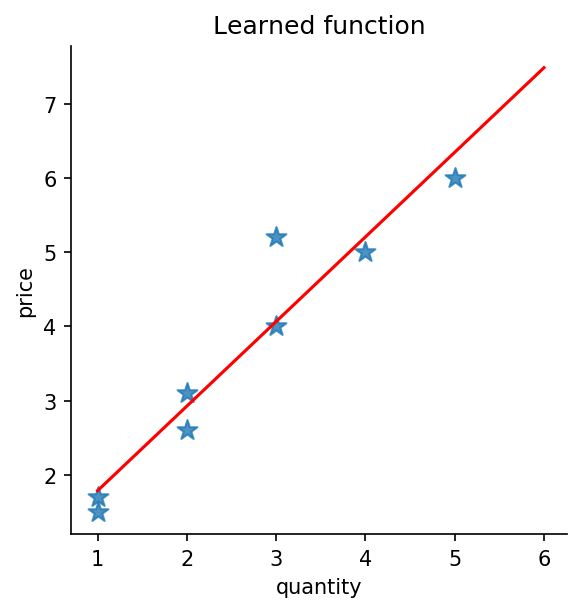

In [51]:
x=np.linspace(1,6,100)
y=[i*a+b for i in x]

sns.lmplot(x='quantity',y='price',data=train_data,fit_reg=False,size=4,markers="*")
plt.title("Learned function")
plt.plot(x, y,color='r')

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly2_reg=PolynomialFeatures(degree=2)
train_data_poly2X=poly2_reg.fit_transform(train_data_X)
train_data_poly2X

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  3.,  9.],
       [ 1.,  3.,  9.],
       [ 1.,  2.,  4.],
       [ 1.,  1.,  1.]])

In [11]:
reg2=linear_model.LinearRegression()
reg2.fit(train_data_poly2X,train_data_Y)
predict2_data_Y=reg2.predict(train_data_poly2X)
MSE2=mean_squared_error(predict2_data_Y,train_data_Y)
MSE2

0.15114583333333342

In [12]:
a2=reg2.coef_[0]
a2

array([ 0.        ,  1.97916667, -0.14583333])

In [13]:
b2=reg2.intercept_[0]
b2

-0.30000000000000293

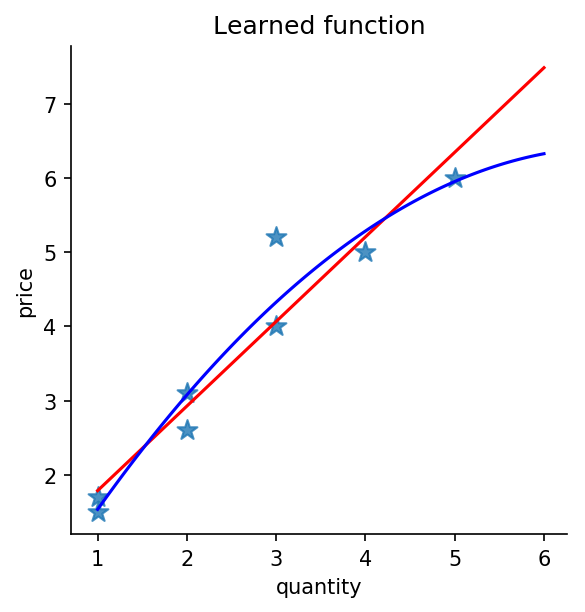

In [52]:
x=np.linspace(1,6,100)
y=[i*a+b for i in x]
y2=[i*i*a2[2]+i*a2[1]+b2 for i in x]
sns.lmplot(x='quantity',y='price',data=train_data,fit_reg=False,size=4,markers="*")
plt.title("Learned function")
plt.plot(x, y,color='r')
plt.plot(x,y2,color='b')

0.10812500000000001


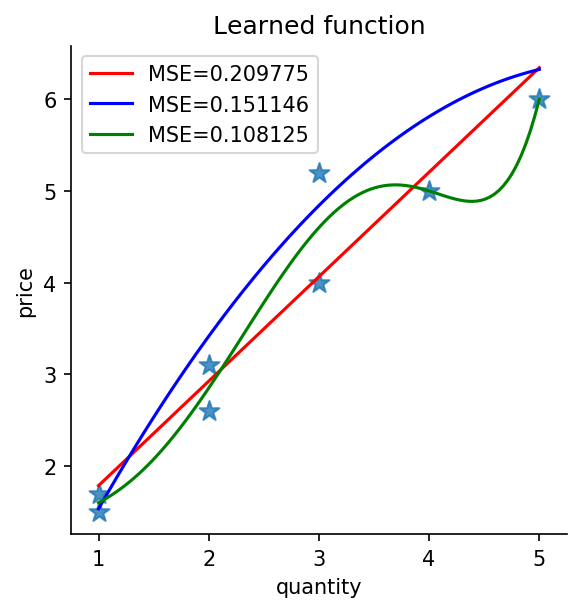

In [55]:
poly6_reg=PolynomialFeatures(degree=6)
train_data_poly6X=poly6_reg.fit_transform(train_data_X)
reg6=linear_model.LinearRegression()
reg6.fit(train_data_poly6X,train_data_Y)
predict6_data_Y=reg6.predict(train_data_poly6X)
MSE6=mean_squared_error(predict6_data_Y,train_data_Y)
print(MSE6)
a6=reg6.coef_[0]
b6=reg6.intercept_[0]
x=np.linspace(1,5,100)
y=[i*a+b for i in x]
y6=[i*i*i*i*i*i*a6[6]+i*i*i*i*i*a6[5]+i*i*i*i*a6[4]+i*i*i*a6[3]+i*i*a6[2]+i*a6[1]+b6 for i in x]
sns.lmplot(x='quantity',y='price',data=train_data,fit_reg=False,size=4,markers="*")
plt.title("Learned function")
plt.plot(x,y,color='r',label='MSE=%f'%MSE1)
plt.plot(x,y2,color='b',label='MSE=%f'%MSE2)
plt.plot(x,y6,color='g',label='MSE=%f'%MSE6)
plt.legend()

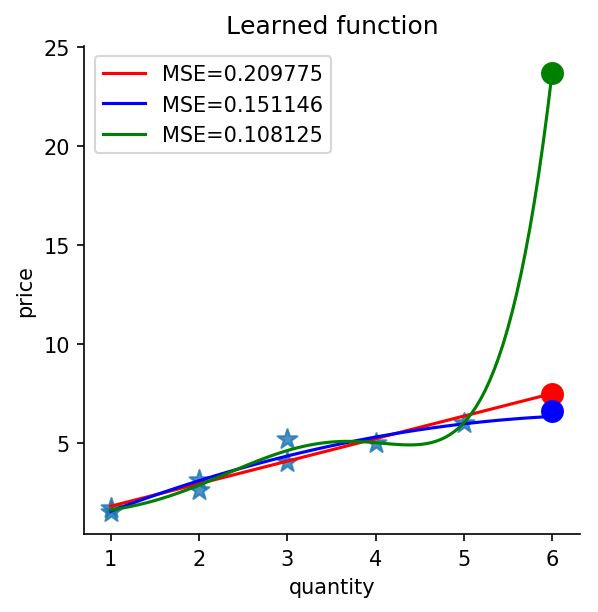

In [54]:
x_new=6
i=6
y_pre=i*a+b
y2_pre=i*i*a2[2]+i*a2[1]
y6_pre=i*i*i*i*i*i*a6[6]+i*i*i*i*i*a6[5]+i*i*i*i*a6[4]+i*i*i*a6[3]+i*i*a6[2]+i*a6[1]+b6

sns.lmplot(x='quantity',y='price',data=train_data,fit_reg=False,size=4,markers="*")
plt.title("Learned function")
plt.plot(x,y,color='r',label='MSE=%f'%MSE1)
plt.plot(x,y2,color='b',label='MSE=%f'%MSE2)
plt.plot(x,y6,color='g',label='MSE=%f'%MSE6)
plt.scatter(x_new,y_pre,color='r')
plt.scatter(x_new,y2_pre,color='b')
plt.scatter(x_new,y6_pre,color='g')
plt.legend()